In [1]:
import os

%load_ext autoreload
%autoreload 2

"""

REvents modulation, simple, for paper figure.
E.g.,
- firing rate change relative to events.
- modulation (across features).
- Simple things.

NOTE:
- previous analyses were all lacking this.
--- ANOVA.
--- "events modulation"
"""

'\n\nREvents modulation, simple, for paper figure.\nE.g.,\n- firing rate change relative to events.\n- modulation (across features).\n- Simple things.\n\nNOTE:\n- previous analyses were all lacking this.\n--- ANOVA.\n--- "events modulation"\n'

# Load a dataset

To load and plot a dataset of neural activity across population, in a PopAnal class object.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
# Method 1 - load a single DFallPA
animal = "Diego"
date = 230615
QUESTION = "PIG_BASE_trial"
DFallpa = load_handsaved_wrapper(animal=animal, date=date, version="trial", ignore_question=True, question=QUESTION)


In [ ]:
# # Method 2 - Combine two dfallpa
# DFallpa1 = load_handsaved_wrapper(animal="Diego", date=230630, version="trial")
# DFallpa2 = load_handsaved_wrapper(animal="Diego", date=230630, version="stroke")
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


In [ ]:
# # Method 2 - Combine two dfallpa
# animal = "Diego"
# date = 231211
# COMBINE_AREAS = True

# DFallpa1 = load_handsaved_wrapper(animal=animal, date=date, version="trial", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa2 = load_handsaved_wrapper(animal=animal, date=date, version="stroke", combine_areas=COMBINE_AREAS, use_time=False)
# DFallpa = pd.concat([DFallpa1, DFallpa2]).reset_index(drop=True)


# Preprocessing

In [ ]:
DFallpa

In [ ]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion, dfpa_concatbregion_preprocess_wrapper
from neuralmonkey.classes.population_mult import extract_single_pa


In [ ]:
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


In [ ]:
# SAVEDIR = f"/lemur2/lucas/analyses/recordings/main/decode_moment/PSYCHO_SP/{animal}-{date}"
SAVEDIR = f"/tmp/EVENTS_MODULATION/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# Preprocessing

In [ ]:
from neuralmonkey.scripts.analy_pig_decode_moment_syntaxTI import dfallpa_preprocess_condition
# shape_var_suff = "shapesemgrp"|
# loc_var_suff = "loc_on_clust"
shape_var_suff = "shape"
loc_var_suff = "loc"
dfallpa_preprocess_condition(DFallpa, shape_var_suff, loc_var_suff)

# Average modulation relative to events

In [ ]:
import numpy as np

In [ ]:
DFallpa

In [ ]:
pa = DFallpa["pa"].values[0]


In [ ]:
pa_base = pa.slice_by_dim_values_wrapper("times", twind_base)
pa_base_scal = pa_base.agg_wrapper("times")

pa.X.shape

pa_norm = pa.copy()

pa_norm.X = pa_norm.X - pa_base_scal.X
# pa_norm.X = pa_norm.X/pa_base.X

Xmean_norm = np.mean(pa_norm.X, axis=1) # (chans, times)

pa_base.X.shape
x = pa_base.dataextract_reshape("chans_x_trialstimes")
xmean = np.mean(x, axis=1)[:, None, None]
xstd = np.std(x, axis=1)[:, None, None]

pa_basenorm_zscore = pa.copy()
pa_basenorm_zscore.X = (pa_basenorm_zscore.X - xmean)/xstd


In [ ]:
def process_pa_extract_fr(pa):
    # For each chan, get its average FR 

    res = {
        "trialmean":np.mean(pa.X, axis=1), # (chans, times)
        "trialstd":np.std(pa.X, axis=1) # (chans, times)
    }

    return res

In [ ]:
# get fr as z-score relative to baseline, across everything


In [ ]:
from neuralmonkey.classes.population_mult import extract_single_pa

In [ ]:
X.shape

In [ ]:
X = X /np.mean(X[:, :40], axis=1)[:, None] # subtrract mean within baseline time winodw


In [ ]:
X.shape

In [ ]:

# subtract baseline
twind_base = (-0.8, 0.8)

times = pa.Times

nrows = len(list_bregion)
ncols = len(list_event)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))

for i, bregion in enumerate(list_bregion):
    for j, event in enumerate(list_event):
        pa = extract_single_pa(DFallpa, bregion, event=event)
        # pa = pa.norm_zscore_rel_base_window(twind_base)
        res = process_pa_extract_fr(pa)

        X = res["trialmean"]
        X = res["trialstd"]

        
        # X = X - np.mean(X[:, :40], axis=1)[:, None] # subtrract mean within baseline time winodw
        # X = X/np.mean(X[:, :80], axis=1)[:, None] # subtrract mean within baseline time winodw

        ax = axes[i][j]
        ax.set_title(f"{bregion}-{event}")

        # line for event
        ax.axvline(0, color="k", alpha=0.5)
        # Each chan
        for x in X:
            ax.plot(times, x, alpha=0.5)

# rows shoud share y axis
from pythonlib.tools.plottools import share_axes_row_or_col_of_subplots
# share_axes_row_or_col_of_subplots(axes, "row", "y")
share_axes_row_or_col_of_subplots(axes, "col", "y")


In [ ]:
# For each site, plot 

In [ ]:
# Improve the normalization?

# Heatmaps -- one subplot each neuron

In [ ]:
from neuralmonkey.neuralplots.population import heatmapwrapper_bregions_events
heatmapwrapper_bregions_events(DFallpa, FILL THIS IN)

In [ ]:

# TODO
# - Overlay events
# - mean over time.
# - scalar score.


In [ ]:
# Get event times.
res = []
for bregion in list_bregion:
    for event in list_event:
        pa = extract_single_pa(DFallpa, bregion, event=event)
        dflab = pa.Xlabels["trials"]
        res.append({
            "bregion":bregion,
            "event":event,
            "times":dflab["event_time"].values
        })
dftimes = pd.DataFrame(res)
dftimes["time_mean"] = [np.mean(times) for times in dftimes["times"]]
dftimes["time_std"] = [np.std(times) for times in dftimes["times"]]


In [ ]:
##### Compute modulation, simply: fr change vs. immediateyl before image onset.

# Get activity as z-score relative to a given time bin.



# NEW METHOD (trialpop) (also see 231203_sanodbox_trialpop.ipynb)

Shift spike times (linear interpolate) before getting snippets

In [ ]:
# overlay event time.
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
MS = load_mult_session_helper(date, animal)   


In [ ]:

# Pick out a single session
SN = MS.SessionsList[0]

# Turn on debug mode, this prunes sites and trials, so below runs faster
# sn.debug_mode_switch_to(sites=True, trials=False)
for SN in MS.SessionsList:
    SN.debug_mode_switch_to(sites=True, trials=True)

In [ ]:
# events = ['fixtch', 'samp', 'go_cue', 'first_raise', 'on_strokeidx_0', 'off_stroke_idx_0']
events=None
sites = MS.sitegetter_all()
PA, fig = MS.popanal_timewarp_rel_events_SHIFTSPIKES(events=events, sites=sites[:2], PLOT=True)

In [ ]:
# Try plotting heatmap

#### Better version, which keeps firing rates unchanged, but just rescales time

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
MS.SessionsList = [MS.SessionsList[0]]

In [ ]:
sites = MS.sitegetter_all(how_combine="intersect")[:2]
sites = None
PAtrial, _, _, _ = MS.popanal_timewarp_rel_events_INTERPRATES(sites=sites, PLOT=True)

### Loading pre-computed PA (trialpop)

In [5]:
from neuralmonkey.analyses.event_temporal_modulation_timewarped import load_and_preprocess_PAtrialpop
animal = "Diego"
date = 230615
PAtrial, DFallpa, SAVEDIR, map_event_to_time = load_and_preprocess_PAtrialpop(animal, date)

TODO: Pancho -- combine circles with the tohers
M1  --  (59, 285, 871)
PMv  --  (79, 285, 871)
PMd  --  (46, 285, 871)
dlPFC  --  (33, 285, 871)
vlPFC  --  (58, 285, 871)
FP  --  (39, 285, 871)
SMA  --  (58, 285, 871)
preSMA  --  (81, 285, 871)
 == (1) Matching chans across events
M1  ...  59
M1  -- n chans final:  59
PMv  ...  79
PMv  -- n chans final:  79
PMd  ...  46
PMd  -- n chans final:  46
dlPFC  ...  33
dlPFC  -- n chans final:  33
vlPFC  ...  58
vlPFC  -- n chans final:  58
FP  ...  39
FP  -- n chans final:  39
SMA  ...  58
SMA  -- n chans final:  58
preSMA  ...  81
preSMA  -- n chans final:  81
 == (2) Remove bad chans based on drift
============== REMOVING DIRTY SITES:
... bregion  M1 ... event  none
Removing these bad chans: [1054]
Chans exist in PA: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037

In [6]:
from neuralmonkey.analyses.event_temporal_modulation_timewarped import heatmap_bregions_events_wrapper
heatmap_bregions_events_wrapper(DFallpa, PAtrial, SAVEDIR)

M1 none  --  [-0.3012159  -0.20010937  0.01248369  0.32405821  0.40640319]
PMv none  --  [-0.56180183 -0.36953453  0.0010158   0.45595091  0.57432661]
PMd none  --  [-0.22714671 -0.18128908 -0.00522293  0.24877628  0.33054158]
dlPFC none  --  [-0.24780963 -0.17522892 -0.01794384  0.17710203  0.24022816]
vlPFC none  --  [-0.27531448 -0.23574823 -0.01813298  0.24371943  0.34178975]
FP none  --  [-0.09608513 -0.0778355   0.0047587   0.10213995  0.13015794]
SMA none  --  [-0.31414885 -0.22717446  0.02430667  0.44788774  0.5731113 ]
preSMA none  --  [-0.28691678 -0.20608767  0.0007909   0.2827995   0.36120772]
X limits (1, 99)-percentile: [-0.4661082   0.58202289]
M1 none  --  [-0.3012159  -0.20010937  0.01248369  0.32405821  0.40640319]
PMv none  --  [-0.56180183 -0.36953453  0.0010158   0.45595091  0.57432661]
PMd none  --  [-0.22714671 -0.18128908 -0.00522293  0.24877628  0.33054158]
dlPFC none  --  [-0.24780963 -0.17522892 -0.01794384  0.17710203  0.24022816]
vlPFC none  --  [-0.2753144

Traceback (most recent call last):
  File "/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2797948/3122518620.py", line 2, in <module>
    heatmap_bregions_events_wrapper(DFallpa, PAtrial, SAVEDIR)
  File "/home/lucas/code/neuralmonkey/neuralmonkey/analyses/event_temporal_modulation_timewarped.py", line 121, in heatmap_bregions_events_wrapper
    fig1, axes1, fig2 = heatmap_bregions_events(DFallpa, "none", base_twind, "none", sort_twind, sort_by,
  File "/home/lucas/code/neuralmonkey/neuralmonkey/analyses/event_temporal_modulation_timewarped.py", line 175, in heatmap_bregions_events
    pa = extract_single_pa(DFallpa, bregion, which_level=which_level, event=base_event, pa_field=pa_field)
  File "/home/lucas/code/neuralmonkey/neuralmonkey/classes/population_mult.py", line 1424, in extract_single_pa
    pa = tmp[pa_field].values[0].co

##### Line plots


In [ ]:
# TODO
# - not just FR, but also 

In [ ]:
# Summarize with a single score. Each neuron 
# mean FR (abs z score.)
# - Immediate visual
# - Ramp during prep
# - Reach
# - Stroke

# Consistency (relative to events)
# - Modulation, locked to each event

In [ ]:
### Using non-warped PA. For each event compute euclidian post minus pre.
DFallpa

In [7]:
from neuralmonkey.analyses.event_temporal_modulation_timewarped import running_euclidian_compute, running_euclidian_scalar_get_windows, running_euclidian_plot_timecourse


In [12]:

dfdists = running_euclidian_compute(DFallpa, PAtrial)

M1 none
PMv none
PMd none
dlPFC none
vlPFC none
FP none
SMA none
preSMA none


In [13]:
map_event_to_contrast = running_euclidian_scalar_get_windows(PAtrial, map_event_to_time)

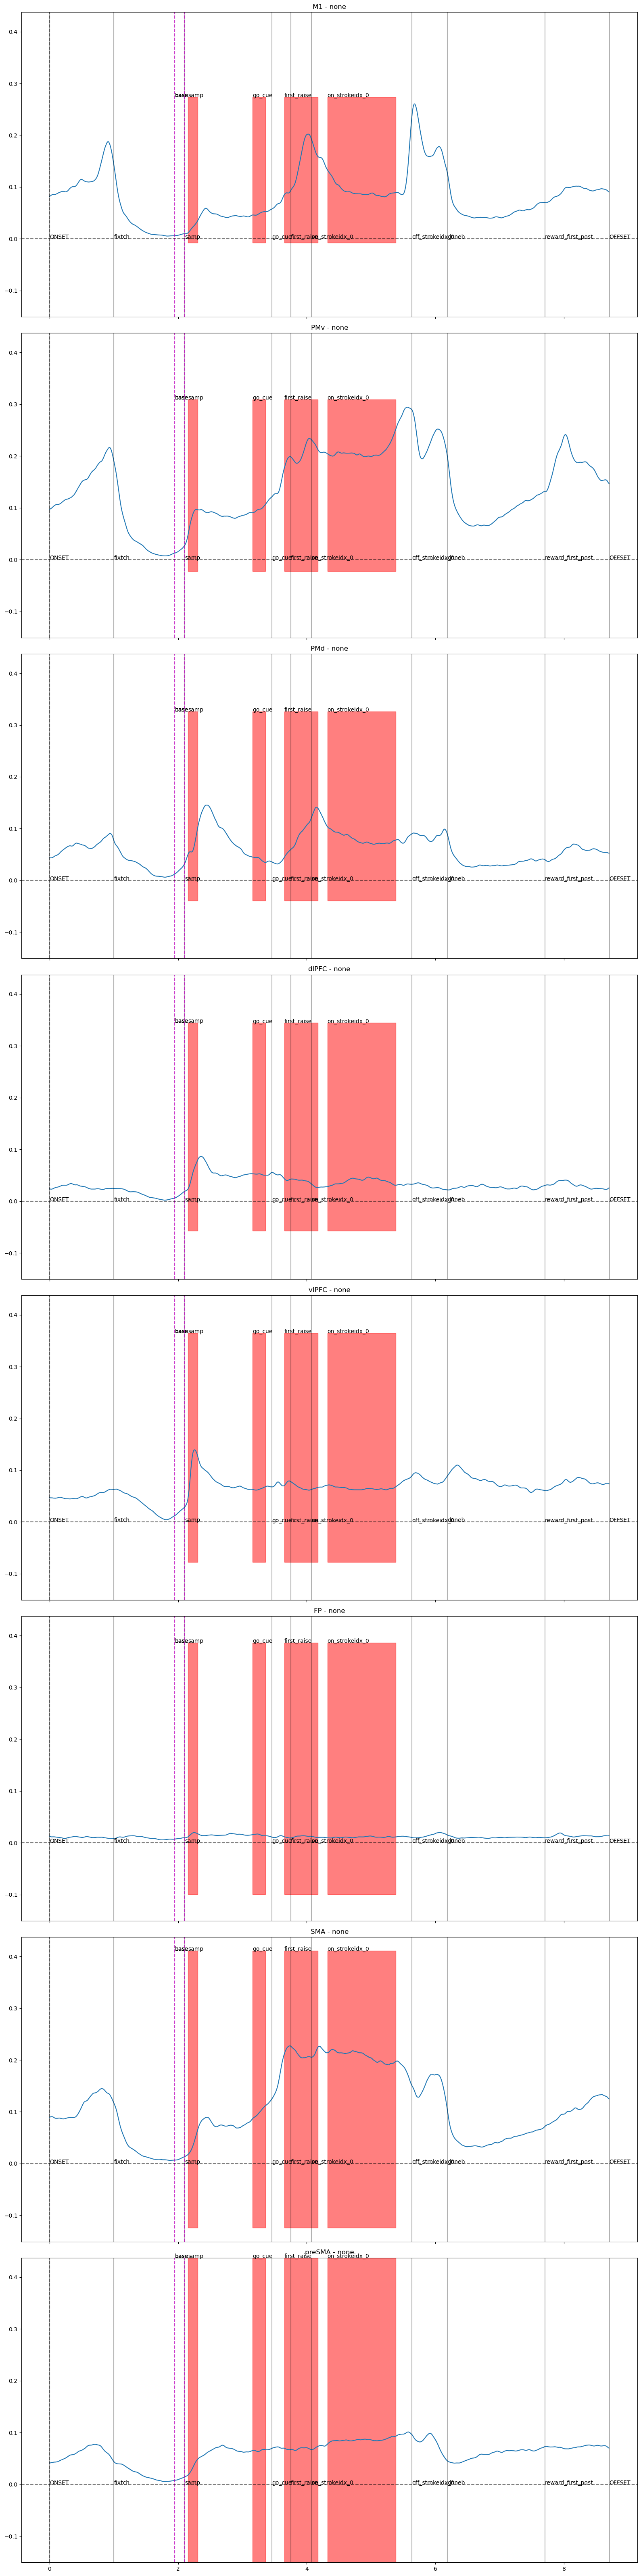

In [14]:
running_euclidian_plot_timecourse(DFallpa, PAtrial, dfdists, map_event_to_contrast, SAVEDIR)


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_euclidian/brainschem-event-scalar_score-norm_None-ALL.pdf
Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_euclidian/brainschem-event-scalar_score-norm_None-ev=samp.pdf


/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1168: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1168: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])


Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_euclidian/brainschem-event-scalar_score-norm_None-ev=on_strokeidx_0.pdf
Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_euclidian/brainschem-event-scalar_score-norm_None-ev=go_cue.pdf


/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1168: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])
/home/lucas/code/pythonlib/pythonlib/tools/pandastools.py:1168: RuntimeWarning: Mean of empty slice
  valthis = np.nanmean(dfsub[val_name])


Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_euclidian/brainschem-event-scalar_score-norm_None-ev=first_raise.pdf


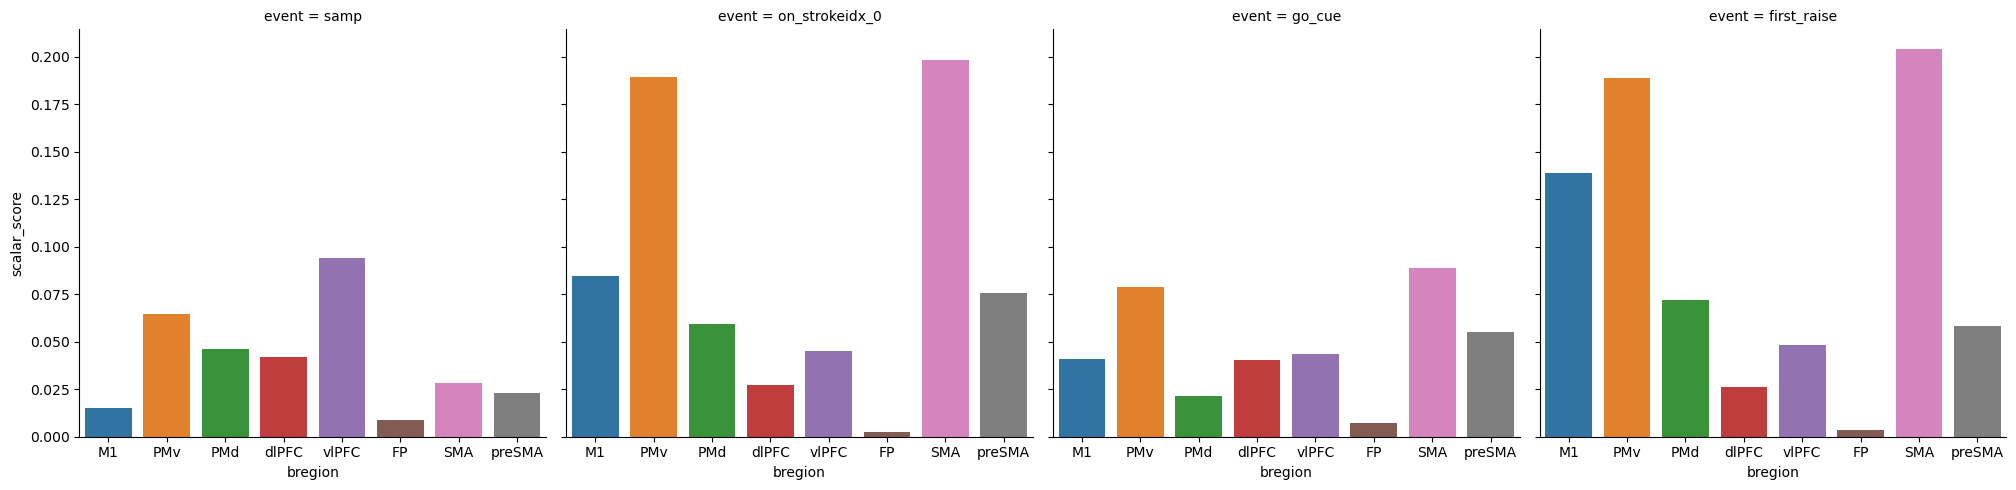

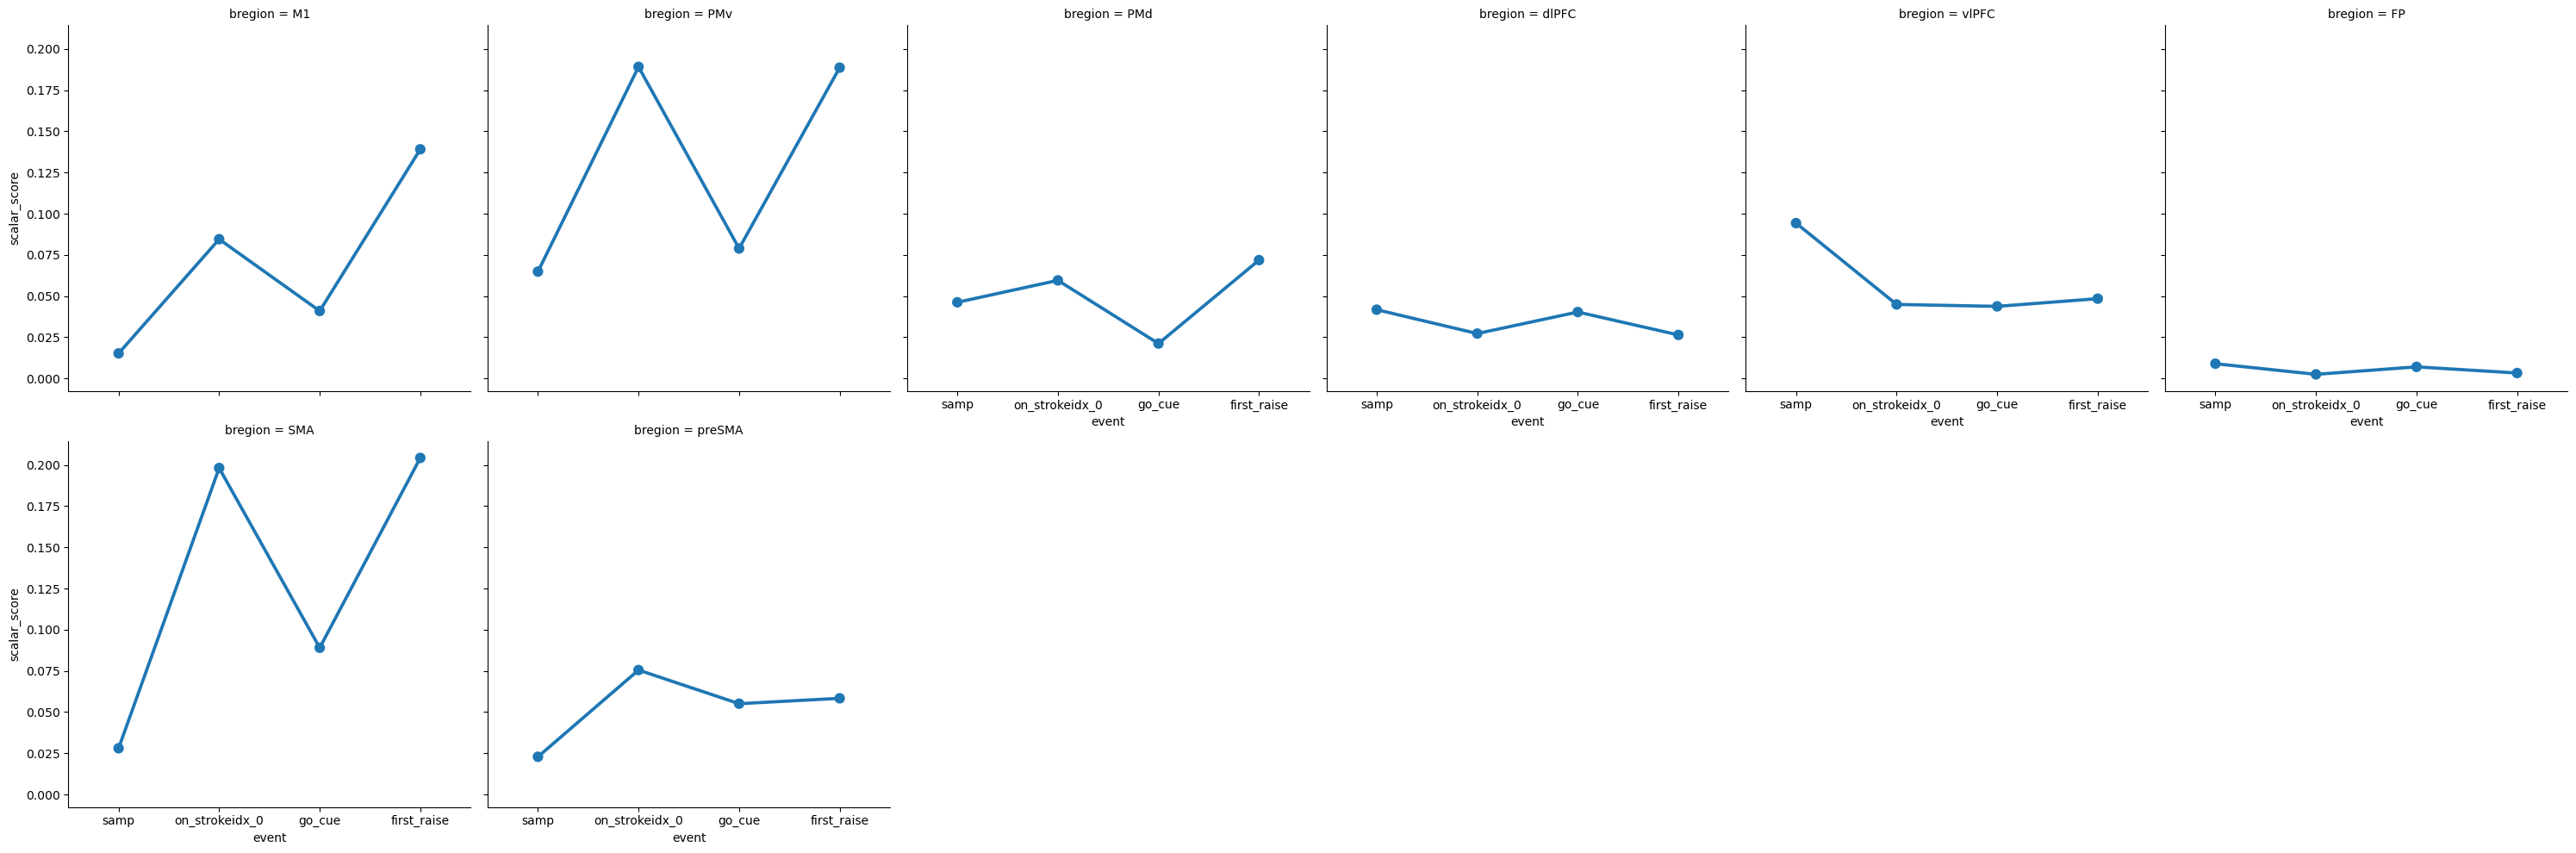

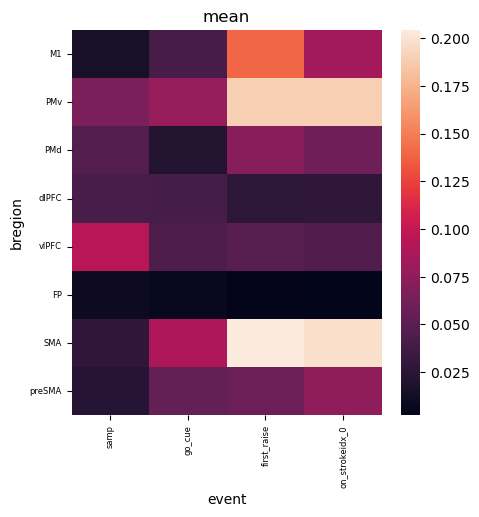

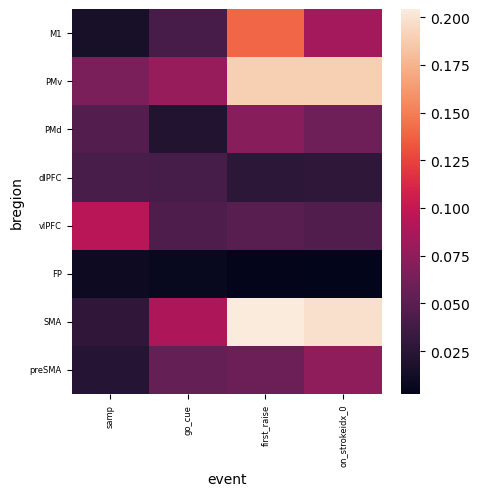

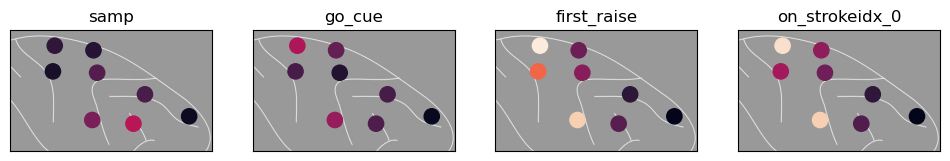

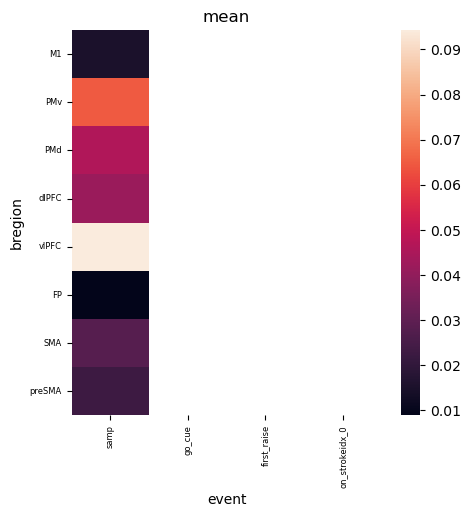

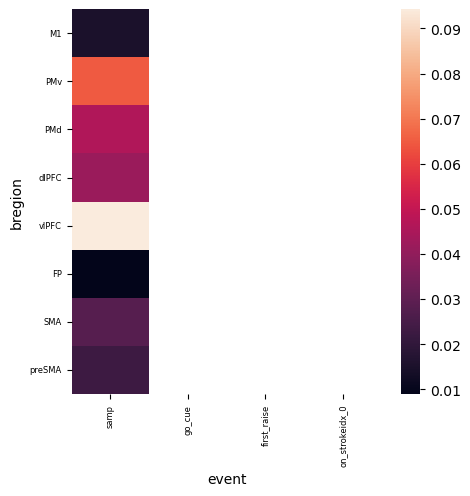

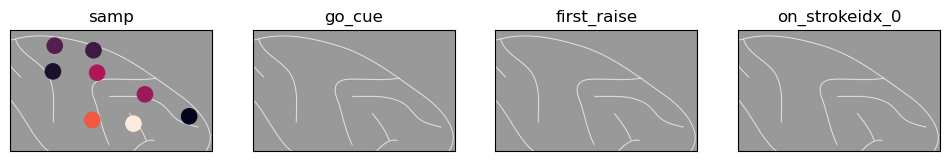

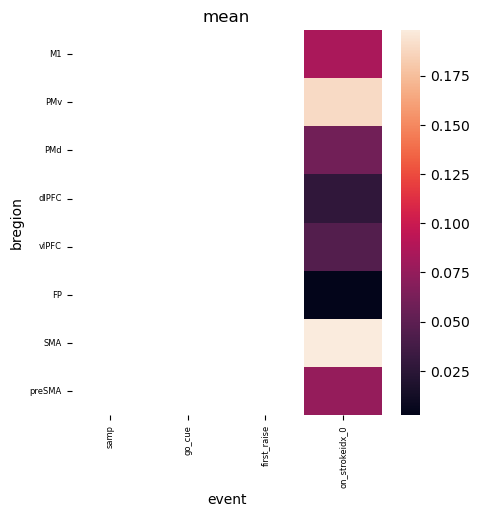

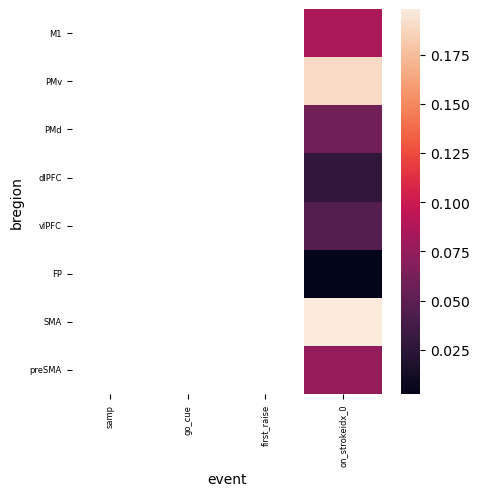

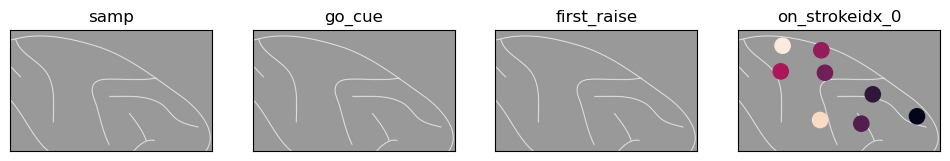

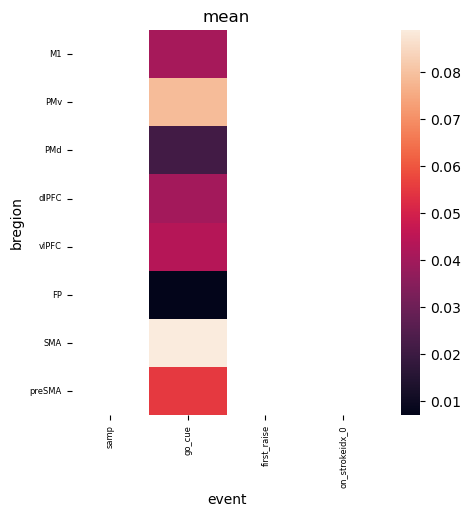

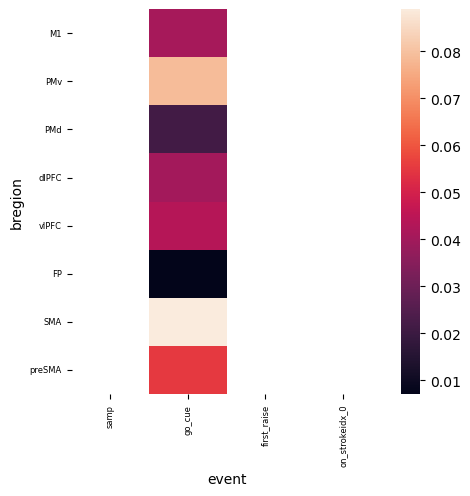

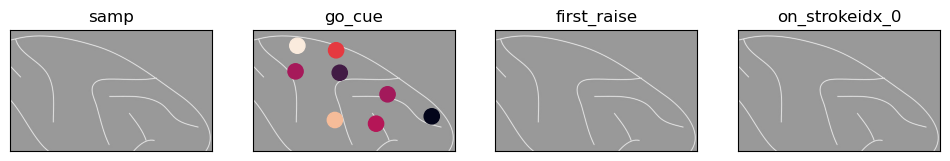

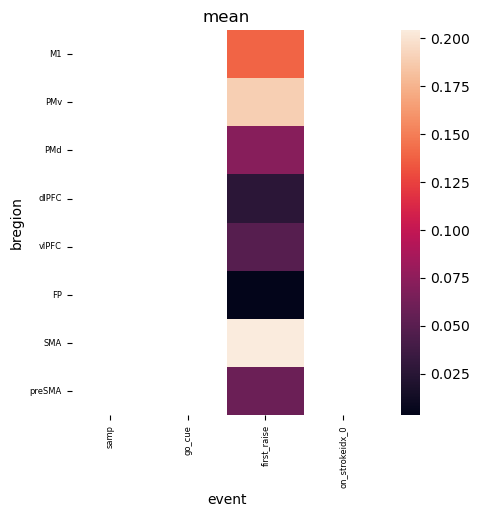

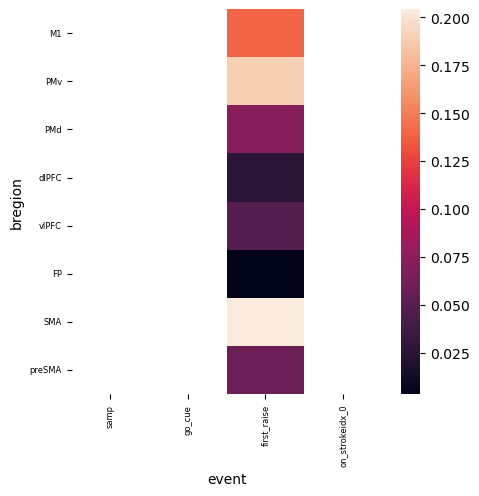

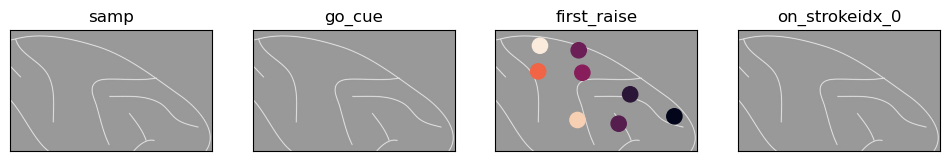

In [15]:
from neuralmonkey.analyses.event_temporal_modulation_timewarped import running_euclidian_compute_scalar
PLOT=True
dfscalar = running_euclidian_compute_scalar(dfdists, map_event_to_contrast, PLOT=True, SAVEDIR=SAVEDIR)


### Compute modulation using anova method (aligned to events)

In [16]:
from neuralmonkey.analyses.event_temporal_modulation_timewarped import running_anova_compute, running_anova_scalar_get_windows, running_anova_plot_timecourse, running_anova_compute_scalar

In [17]:
dfmodu = running_anova_compute(DFallpa)

M1 none
PMv none
PMd none
dlPFC none
vlPFC none
FP none
SMA none
preSMA none


In [18]:
map_event_to_twind = running_anova_scalar_get_windows(map_event_to_time)

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


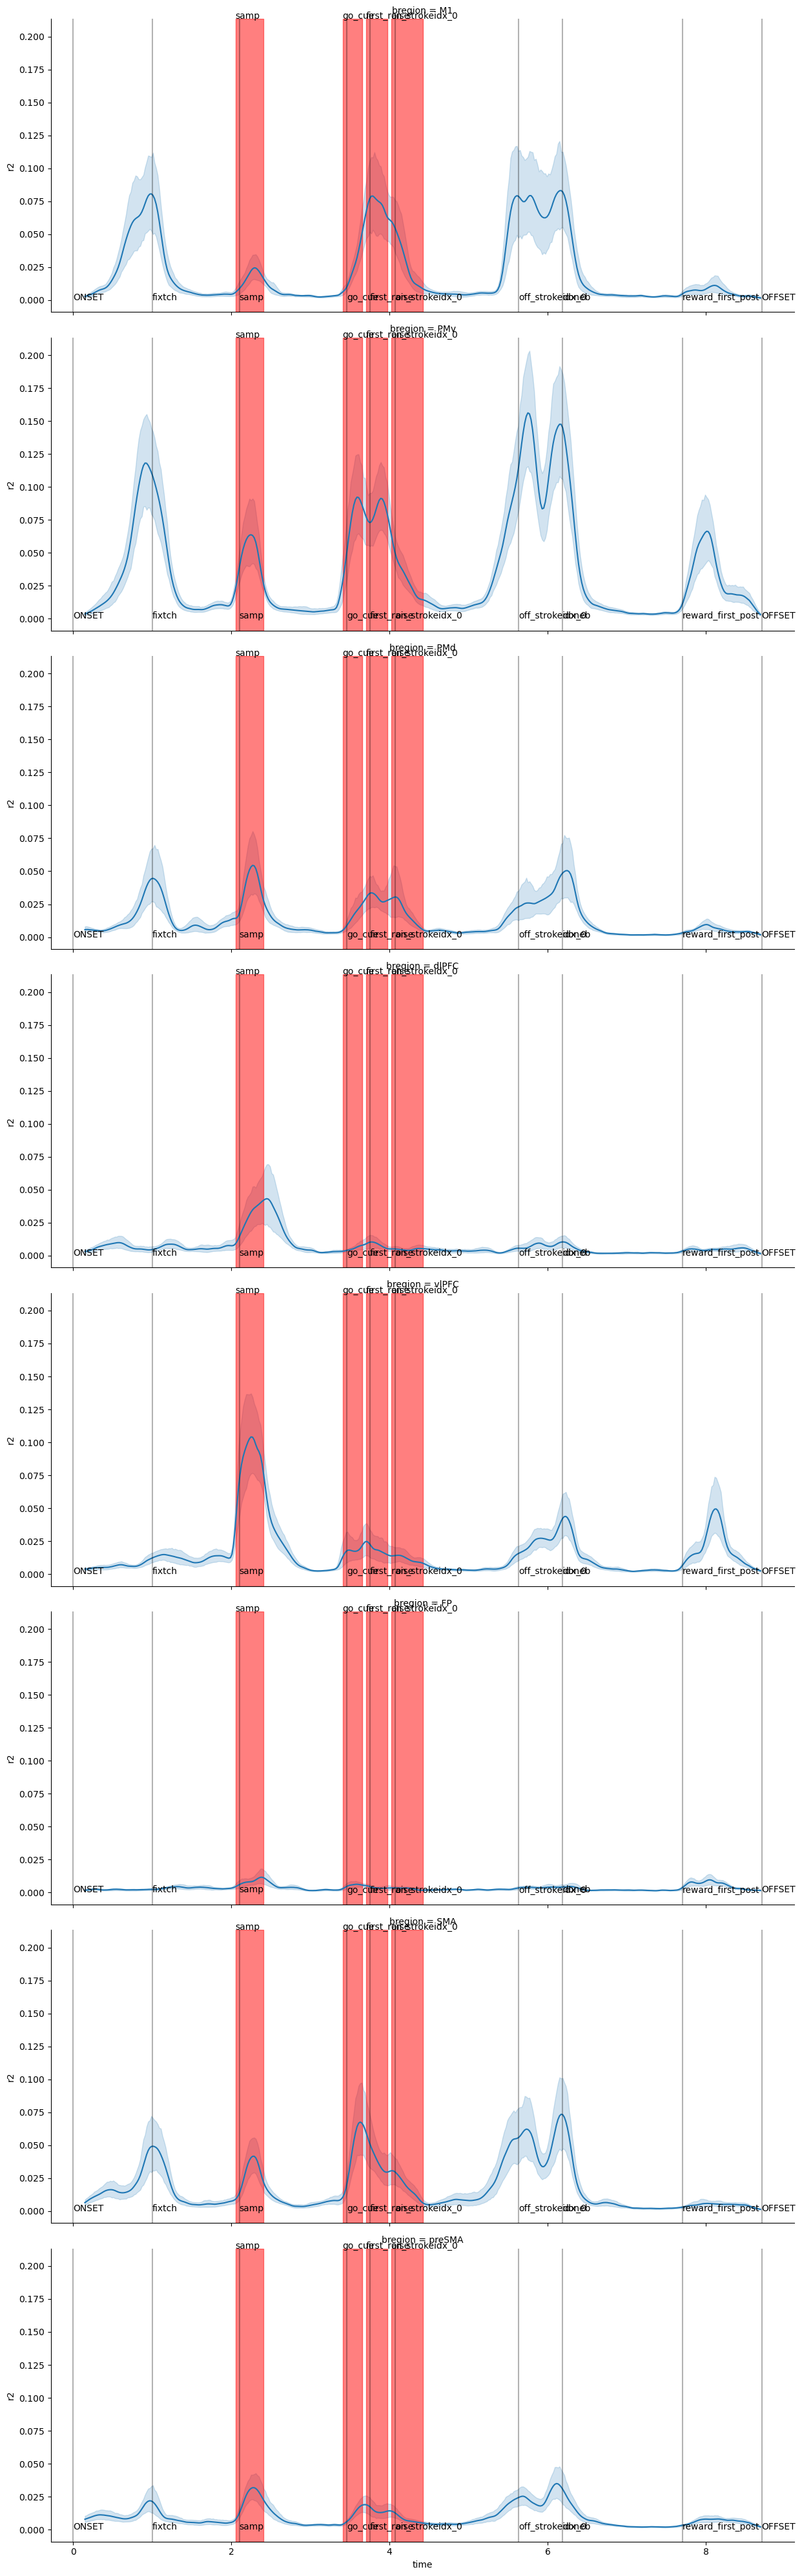

In [19]:
running_anova_plot_timecourse(PAtrial, dfmodu, map_event_to_twind, SAVEDIR)

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Saving to:  /lemur2/lucas/analyses/recordings/main/events_modulation_timewarped/Diego-230615-using_timewarped/running_anova/brainschem-agg_event-r2-norm_None-ALL.pdf


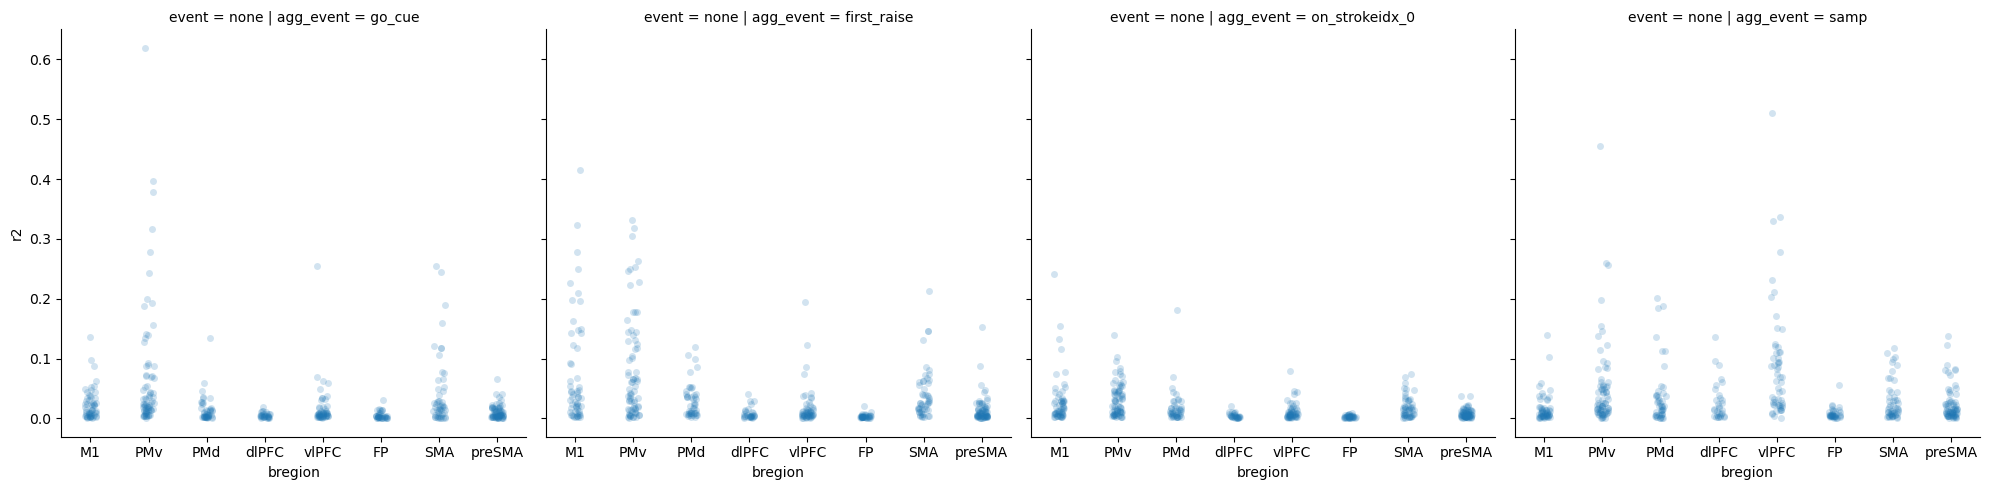

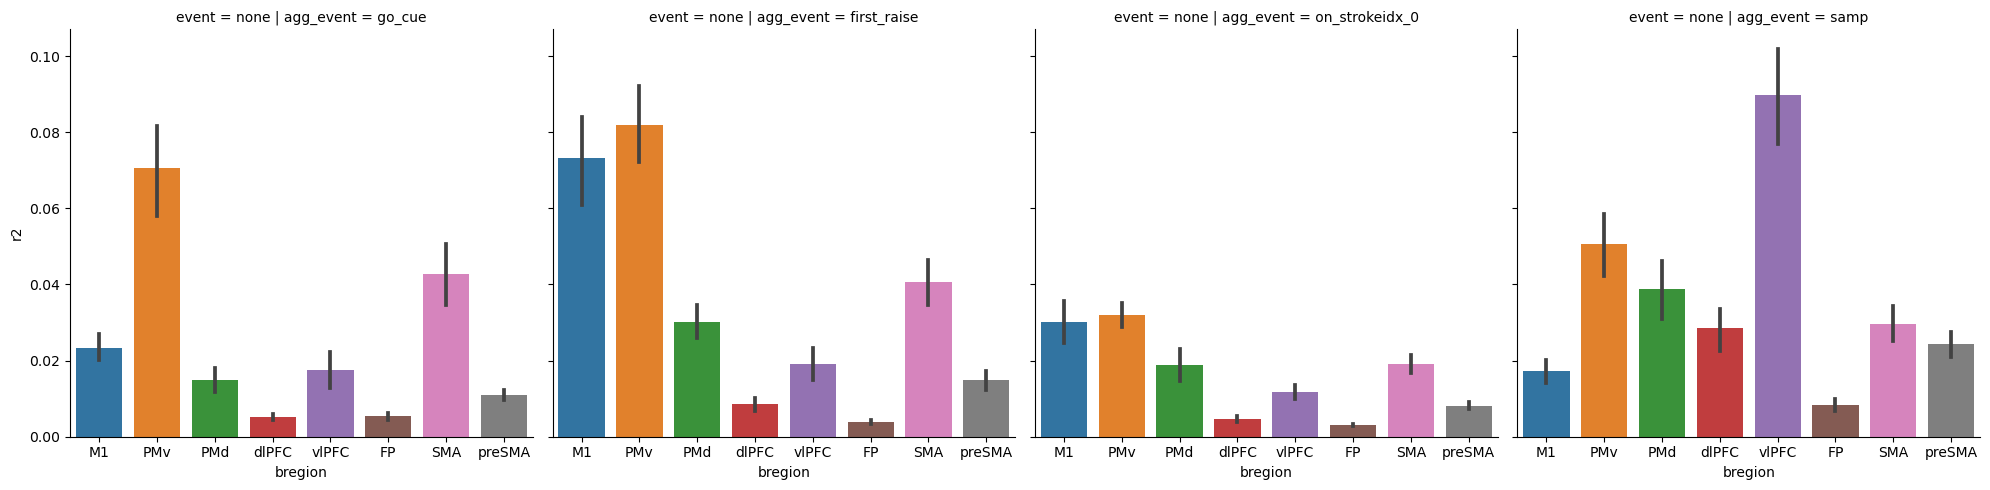

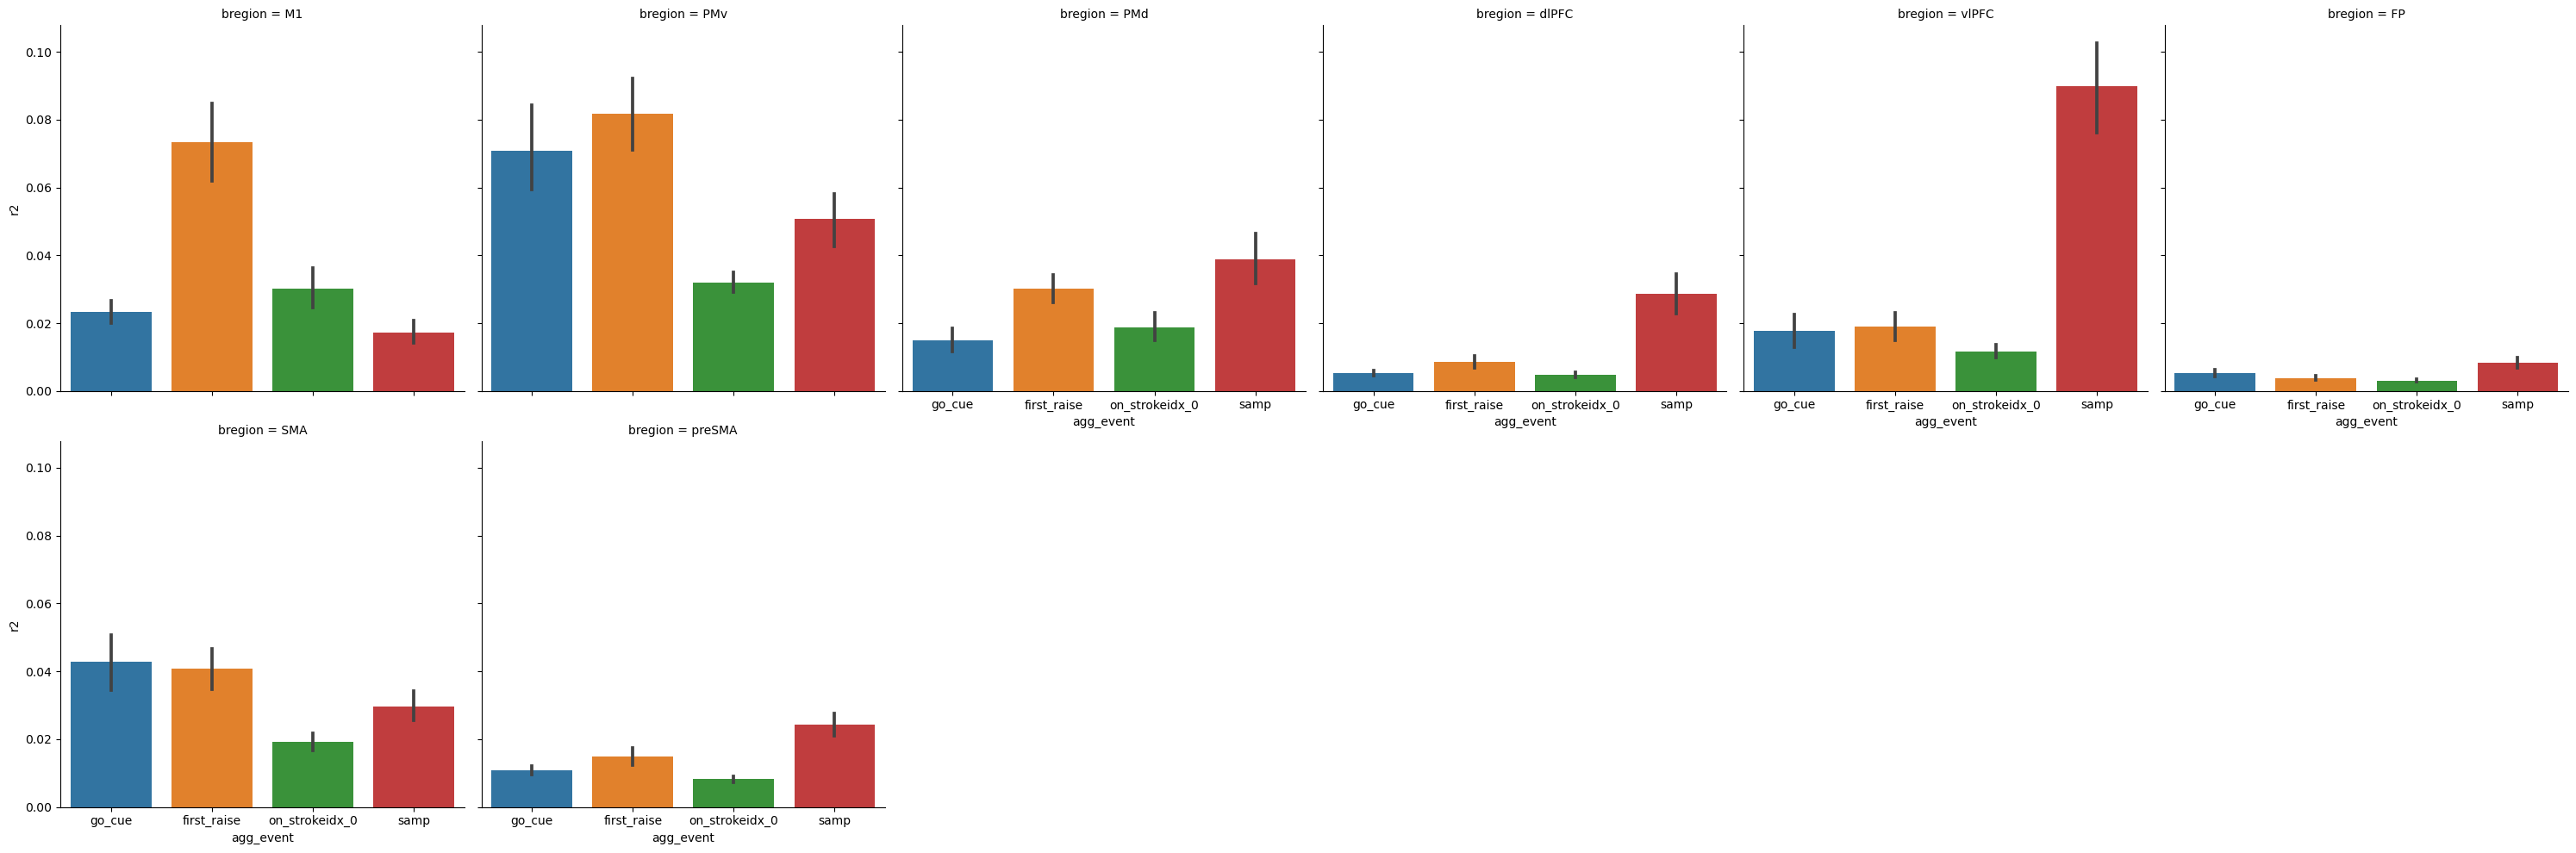

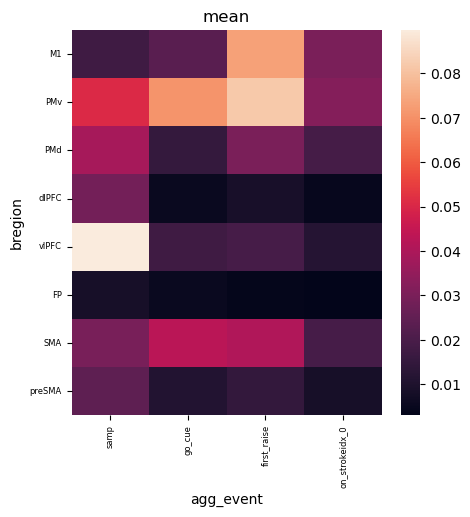

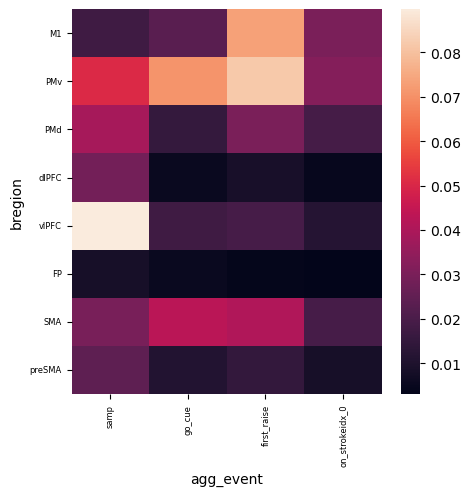

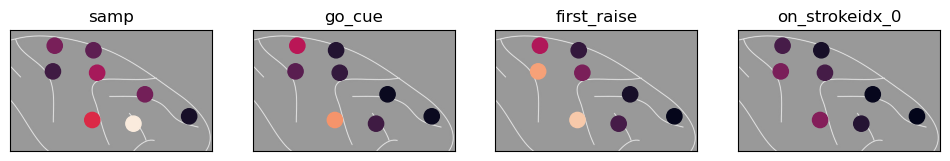

In [20]:
PLOT=True
# subplot_var_values = list(map_event_to_twind.keys())
dfscalar = running_anova_compute_scalar(dfmodu, map_event_to_twind, PLOT, SAVEDIR)

In [54]:
pa.split_train_test_random(0.1)

(<neuralmonkey.classes.population.PopAnal at 0x73f54632c550>,
 <neuralmonkey.classes.population.PopAnal at 0x73f5897386d0>)

In [42]:
pa = DFallpa["pa"].values[0]

pa.agg_by_time_windows_binned(DUR, SLIDE)